# Практическая работа №2: Исследование подгрупп сетей. Сети аффилированности.
Выполнил студент гр. 0381 Кирильцев Даниил. Вариант №7

## Цель работы


Овладеть навыками работы с математическими пакетами для исследования подгрупп в социальных сетях, а также моделирования, отображения
и анализа сетей аффилированности.

## Основные теоретические положения

* n-клика - максимальный подграф, в котором наибольшее геодезическое расстояние между любыми двумя узлами не превышает n.

* n-клан - n-клика, в которой геодезическое расстояние между всеми узлами в подграфе не превышает n для путей внутри подграфа.

* n-клуб - максимальный подграф диаметра меньше либо равно n.

* k-ядро - максимальный подграф, в котором каждая вершина связана минимум с k другими вершинами этого же подграфа.

* k-плекс - максимальный подграф, содержащий $g_s$ узлов, в котором каждый узел смежен с не менее чем с $g_s - k$ узлами подграфа.



* Модулярность - показатель модулярности определяется как разница между долей связей внутри группы и ожидаемой доли связей, если бы связи были размещены случайно.

*  Сеть аффилированности - сеть, в которой участники аффилированы друг с другом на основе сотрудничества в рамках какой-то группы или совместного участия в определённом событии. Сеть состоит из двух измерений: множества акторов $\mathcal{N}=\{n_1...n_g\}$ и множества событий $\mathcal{M}=\{m_1...m_h\}$

*  Гиперграф - обобщение понятия графа: гиперграф состоит из множества объектов и множества подмножеств объектов, в котором каждый объект принадлежит хотя бы одному подмножеству, причем ни одно подмножество не является пустым.

  $ {H = H(A, B)}$, где ${A} = \{a_1, ..., a_n\}$ - множество объектов; ${B} = \{b_1, ..., b_n\} - множество ребер$

*  Двойственный гипеграф для гипперграфа $ {H = H(A, B)}$:

  $ {H* = H(B, A)}$, где ${A} = \{a_1, ..., a_n\}$ - множество ребер; ${B} = \{b_1, ..., b_n\} - множество объектов$

* Матрица соучастия акторов 

  $X^{\cal{N}} = \{x_{ij}^{\cal{N}} \}$

  $x_{ij}^{\cal{N}} = \sum_{k = 1}^{h} a_{ik}a_{jk}$

* Матрица перекрытия событий

  $X^{\cal{M}} = \{x_{kl}^{\cal{M}} \}$

  $x_{kl}^{\cal{M}} = \sum_{i = 1}^{g} a_{ik}a_{jl}$

* Степень участия - количество событий, с которым связан каждый актор.

  $a_{i+} = \sum_{j = 1}^{h} a_{ij} = x_{ii}^{\cal{N}}$

* Размер событий

  $a_{+j} = \sum_{i = 1}^{g} a_{ij} = x_{ii}^{\cal{M}}$

* Средний размер событий - среднее количество акторов в каждом событии или средняя степень узлов, представляющих события в двудольном графе.

  $\overline {a}_{ij} = \frac{1}{h} \sum_{j = 1}^{h} x_{jj}^{\cal{M}}$

* Диаметр аффилированной сети - длина самого длинного пути между любой парой акторов и/или событий.

* Клика уровня с для отношения соучастия - подграф, в котором все пары акторов совместно участвуют не менее чем в c событиях.

* Клика уровня с для отношения перекрытия - подграф, в котором все пары событий имеют не менее с общих членов.

* Плотность:

 для отношения соучастия: $\Delta_{(\mathcal{N})} = \frac1{g(g-1)} \sum_{i=1}^g\sum_{j=1; j\ne i}^g x_{ij}^\mathcal{N}$ - $\in[0; h]$

 для отношения перекрытия: $\Delta_{(\mathcal{M})} = \frac1{h(h-1)} \sum_{k=1}^h\sum_{l=1; l\ne k}^h x_{kl}^\mathcal{M}$ - $\in[0; g]$

* Отношение шансов - мера перекрытия между событиями, которая не зависит от размера событий: $\Theta_{kl}=\frac{x_{kl}^\mathcal{M} x_{\bar{kl}}^\mathcal{M}}{x_{k\bar{l}}^\mathcal{M}x_{\bar{k}l}^\mathcal{M}}$



## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей на предмет подгрупп. Провести
исследование сети аффилированности CEO. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы
Каждый пункт работы (*по возможности*) выполняется с помощью кода.
Рекомендованные языки программирования – R или Python.

In [5]:
install.packages("igraph")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### 1. Из файла florentine_business.csv (для нечётных вариантов) извлечь социоматрицу с помощью соответствующих функций. Отобразить сеть с помощью одного из алгоритмов укладки.

* Извлечем и посмотрим на социоматрицу



In [46]:
fb.dataset <- read.table("florentine_business.csv", header = TRUE, sep = ',')
fb.sociomatrix <- data.matrix(fb.dataset)
rownames(fb.sociomatrix) <- colnames(fb.sociomatrix)
fb.sociomatrix

,Acciaiuoli,Albizzi,Barbadori,Bischeri,Castellani,Ginori,Guadagni,Lamberteschi,Medici,Pazzi,Peruzzi,Pucci,Ridolfi,Salviati,Strozzi,Tornabuoni
Acciaiuoli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Albizzi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Barbadori,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0
Bischeri,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
Castellani,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
Ginori,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
Guadagni,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
Lamberteschi,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0
Medici,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
Pazzi,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


* Преобразуем сеть в граф, чтобы тобразить её с помощью алгоритма укладки Камада-Каваи

In [7]:
fb.graph <- igraph::graph.adjacency(fb.sociomatrix, mode='undirected')

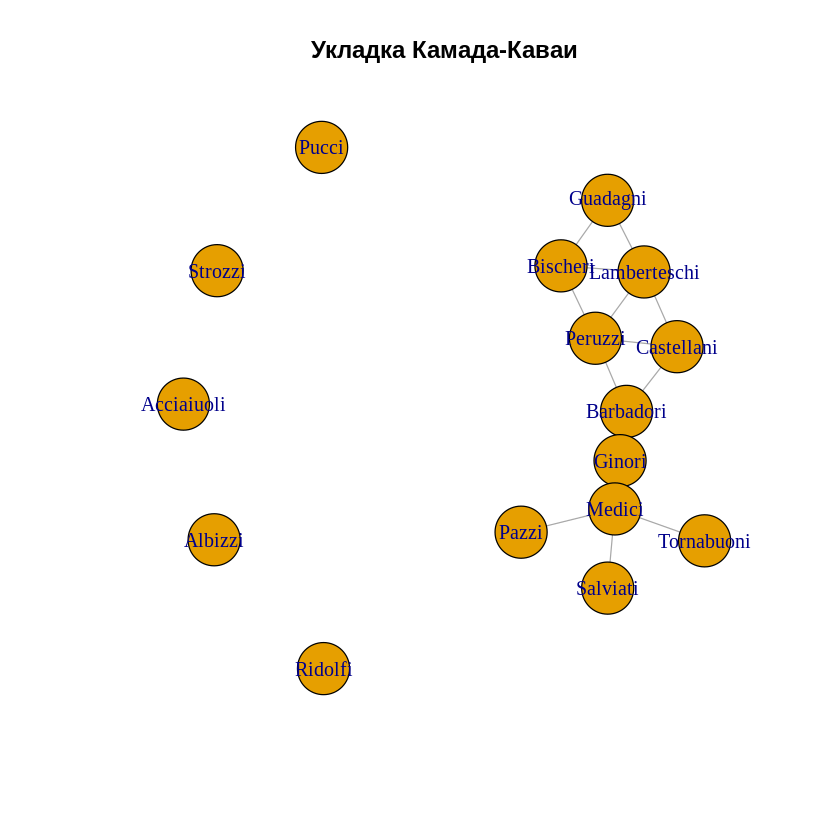

In [8]:
plot(fb.graph,
     layout=igraph::layout.kamada.kawai, 
     main='Укладка Камада-Каваи', 
     vertex.size=20)

### 2. Исследовать данную сеть на предмет подгрупп с помощью:
* 𝑛-клик;
* 𝑛-кланов;
* 𝑛-клубов;
* 𝑘-ядер;
* 𝑘-плексов.

### Указать какие подгруппы плучились. Сделать выводы.

* Исследуем данную сеть на предмет n-клик

In [32]:
igraph::clique_num(fb.graph)

[1] 3

### 3. С помощью библиотеки igraph исследовать алгоритмы обноружения сообществ в зависимости от номера варианта: (2) Spinglass, Walktrap, Label propagation;

In [49]:
7 %% 3 + 1 #вычисление варианта

[1] 2

In [51]:
fb.sociomatrix.wosingletons <- fb.sociomatrix[,-c(1, 2, 12, 13, 15)]
fb.sociomatrix.wosingletons <- fb.sociomatrix.wosingletons[-c(1, 2, 12, 13, 15),]
fb.sociomatrix.wosingletons

,Barbadori,Bischeri,Castellani,Ginori,Guadagni,Lamberteschi,Medici,Pazzi,Peruzzi,Salviati,Tornabuoni
Barbadori,0,0,1,1,0,0,1,0,1,0,0
Bischeri,0,0,0,0,1,1,0,0,1,0,0
Castellani,1,0,0,0,0,1,0,0,1,0,0
Ginori,1,0,0,0,0,0,1,0,0,0,0
Guadagni,0,1,0,0,0,1,0,0,0,0,0
Lamberteschi,0,1,1,0,1,0,0,0,1,0,0
Medici,1,0,0,1,0,0,0,1,0,1,1
Pazzi,0,0,0,0,0,0,1,0,0,0,0
Peruzzi,1,1,1,0,0,1,0,0,0,0,0
Salviati,0,0,0,0,0,0,1,0,0,0,0


In [52]:
fb.graph.wosingletons <- igraph::graph.adjacency(fb.sociomatrix.wosingletons, mode='undirected')

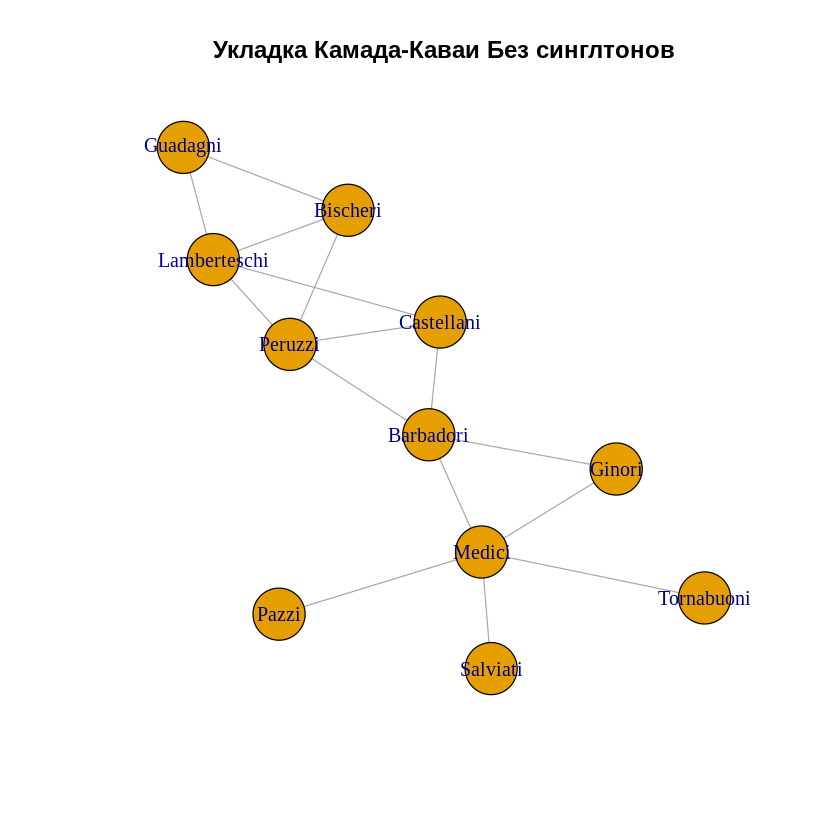

In [62]:
plot(fb.graph.wosingletons,
     layout=igraph::layout.kamada.kawai, 
     main='Укладка Камада-Каваи Без синглтонов', 
     vertex.size=20)

* Spinglass опирается на аналогию между моделью стат. механики, которая называется спин гласс Поттса (Potts spin glass), используя метод отжига, чтобы оптимизировать модулярность.

[1] 0.3644444

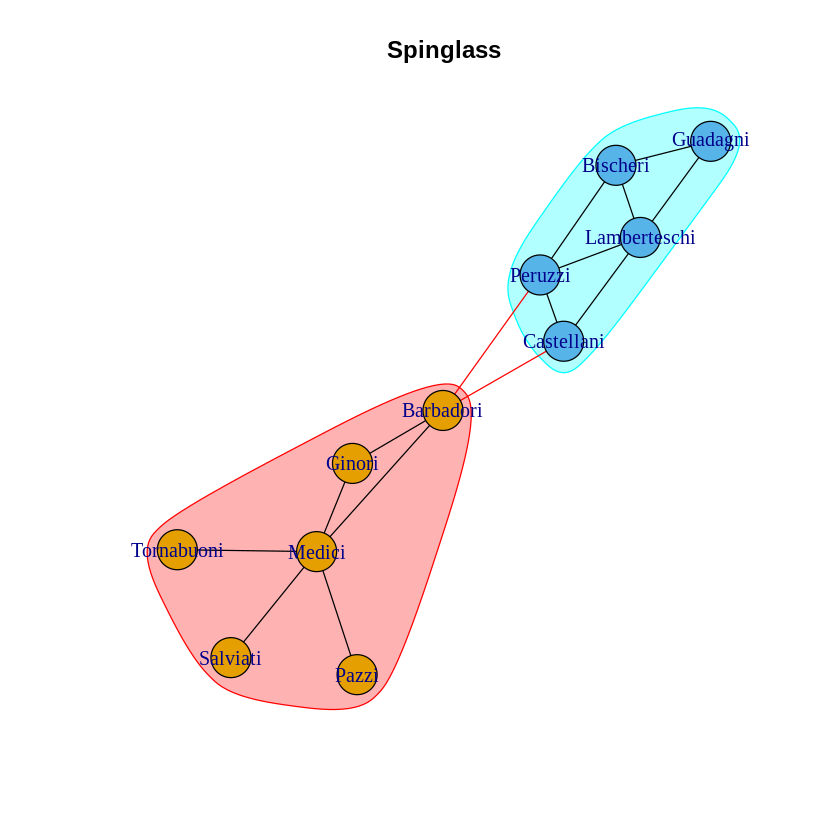

In [64]:
spinglass <- igraph::cluster_spinglass(fb.graph.wosingletons)
fb.adjacency.wosingletons <- igraph::graph.adjacency(fb.sociomatrix.wosingletons, mode = "undirected")
plot(spinglass, fb.adjacency.wosingletons,  main="Spinglass")
spinglass$modularity

* Walktrap - данный алгоритм пытается найти с помощью случайных путей в плотно соединенных подграфах (сообществах). Идея заключается в том, что короткие случайные пути имеют тенденцию оставаться в том же самом сообществе. 

[1] 0.3644444

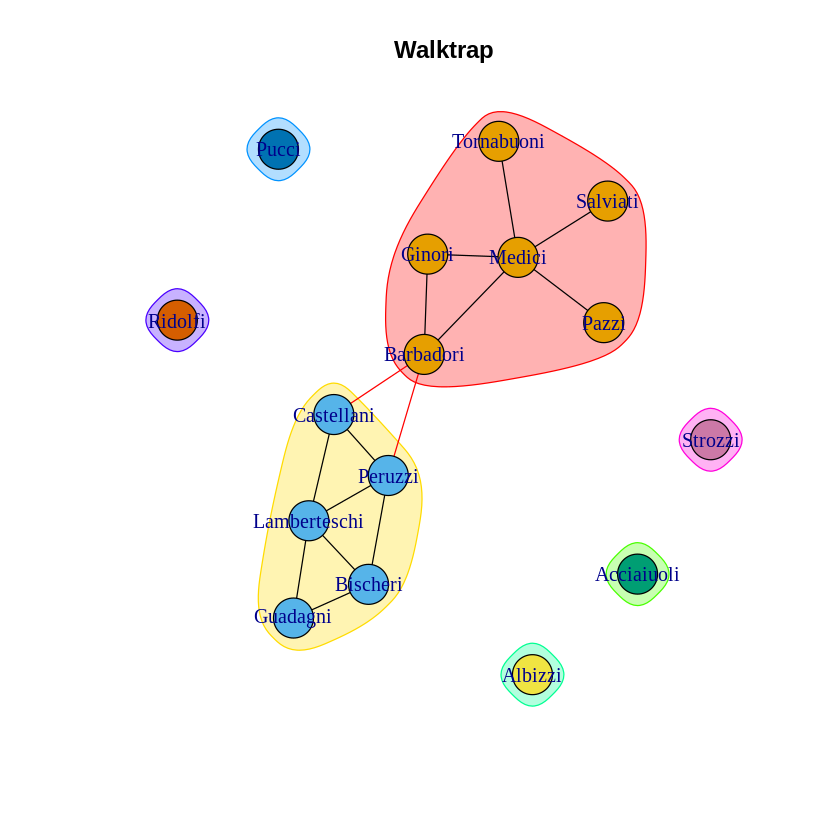

In [80]:
walktrap <- igraph::cluster_walktrap(fb.graph)

plot(walktrap, fb.graph, main="Walktrap")
igraph::modularity(walktrap)

* Label Propagation - в этом алгоритме каждой вершине присваивается уникальная метка и на каждом шаге каждая вершина адаптирует свою метку к самой популярной среди соседей. Через данный процесс, вершины, которые находятся в сообществе приходят к согласию относительно метки. 

[1] 0.3644444

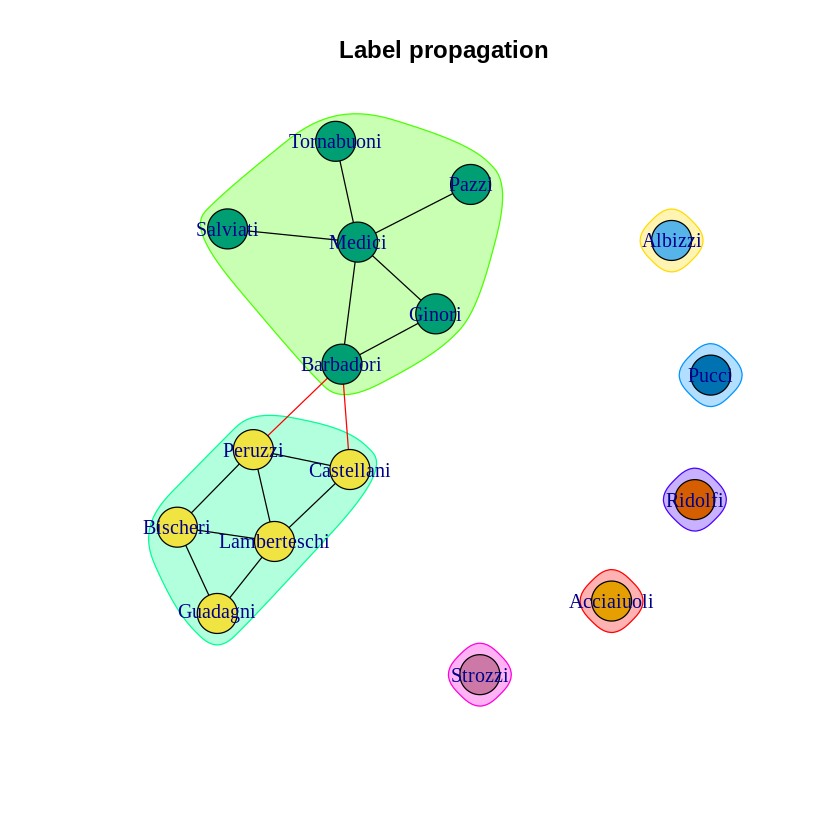

In [84]:
labelprop <- igraph::cluster_label_prop(fb.graph)
plot(labelprop, fb.graph, main="Label propagation")
igraph::modularity(labelprop)

Выводы: Как можно увидеть разные алгоритмы согласуются относительно модулярности.

### 4. Из файла ceo.csv извлечь матрицу инцидентности с помощью соответствующих функций. Отобразить полученную матрицу.

In [10]:
ceo.incmatrix <- read.table("ceo.csv", skip=9, sep = ',')
ceo.incmatrix

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
0,0,1,0,1,0,1,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
0,0,1,1,0,0,0,0,0,1,1,0,0,0,0
0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,1,0,1,0,0,0,0,0


### 5. Отобразить сеть в виде биграфа.

In [11]:
ceo.graph <- igraph::graph.incidence(ceo.incmatrix)
igraph::is.bipartite(ceo.graph) # Проверка на биграф

[1] TRUE

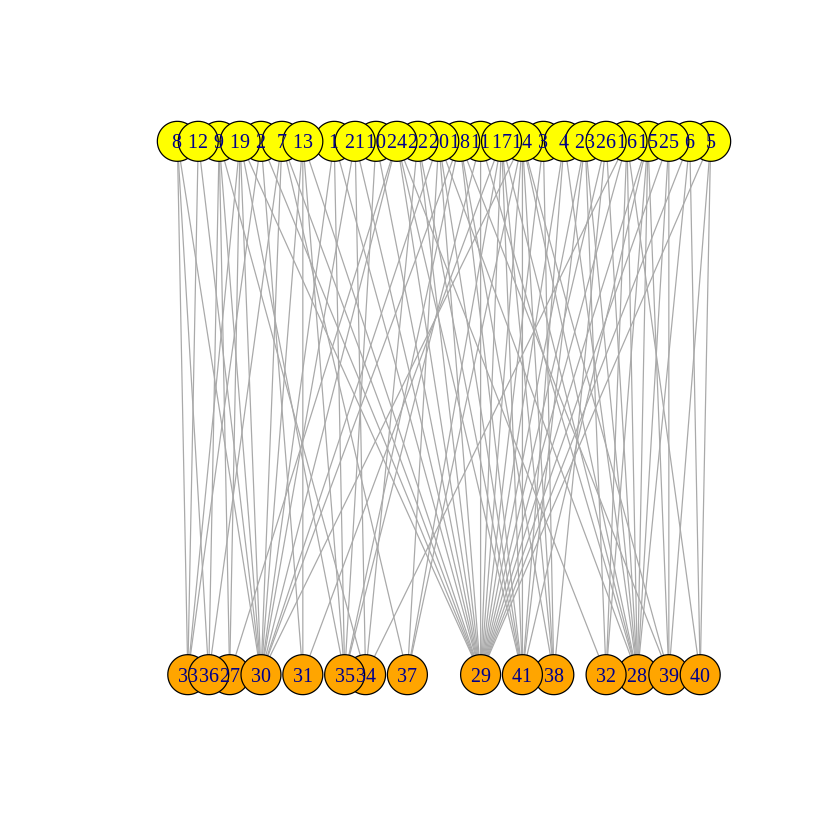

In [12]:
colors <- c("yellow", "orange")[igraph::V(ceo.graph)$type + 1]

plot(ceo.graph,
     vertex.color=colors, 
     layout=igraph::layout_as_bipartite)

### 6. Отобразить сеть в виде гиперграфа и двойственного гиперграфа (по желанию).

In [13]:
install.packages("HyperG")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘RcppEigen’, ‘mclust’, ‘proxy’, ‘RSpectra’, ‘gtools’




In [14]:
ceo.hg <- HyperG::as.hypergraph(ceo.graph)

Построим 2-uniform hypergraph

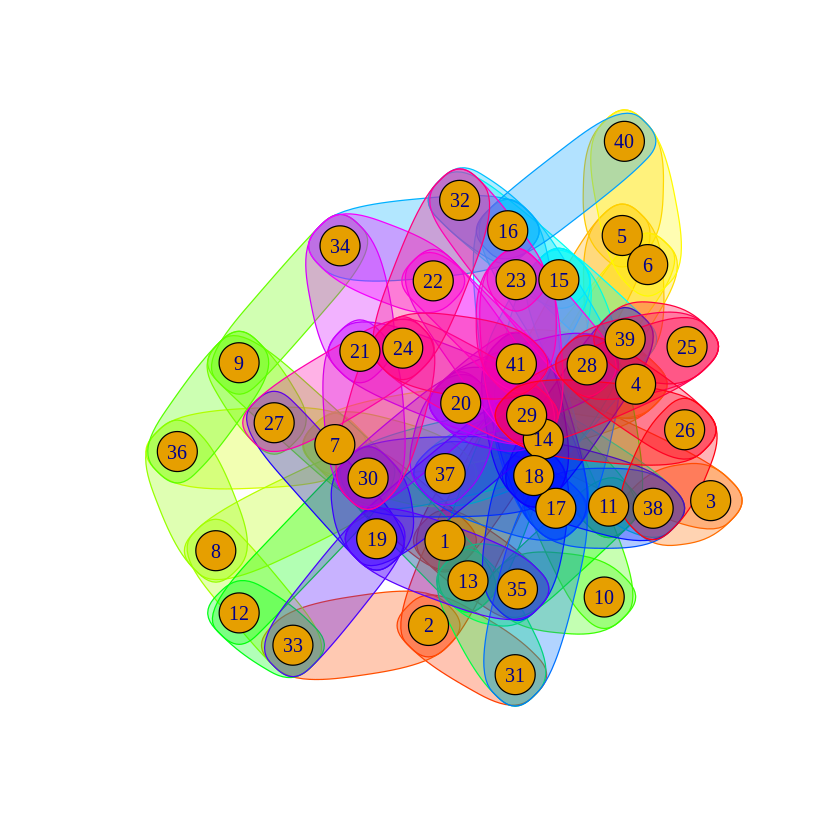

In [15]:
plot(ceo.hg, mark.groups=HyperG::hypergraph_as_edgelist(ceo.hg))

Построим двойственный гиперграф

In [16]:
ceo.dual.hg <- HyperG::dual_hypergraph(ceo.hg)

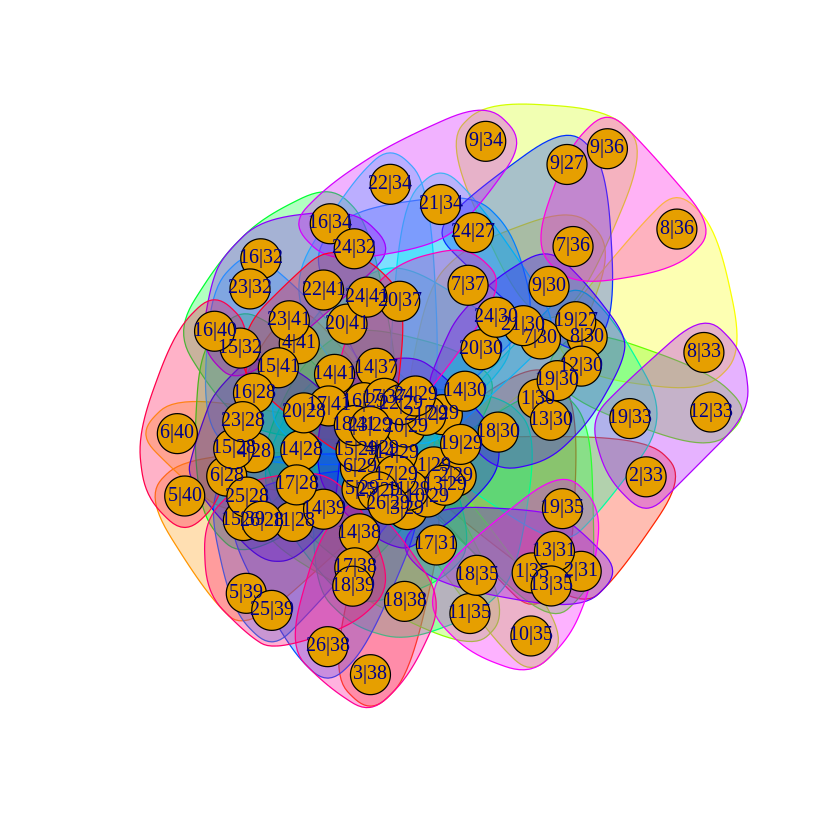

In [17]:
plot(ceo.dual.hg, mark.groups=HyperG::hypergraph_as_edgelist(ceo.dual.hg))

### 7. Представить сеть аффилированности в виде двух одномодальных сетей: сеть соучастия и сеть перекрытия событий. Представить полученные сети в виде ценностных матриц и взвешенных графов. Сделать выводы.

In [18]:
ceo.agents.adjacency <- (as.matrix(ceo.incmatrix) %*% t(as.matrix(ceo.incmatrix)))
ceo.events.adjacency <- ((t(as.matrix(ceo.incmatrix)) %*% as.matrix(ceo.incmatrix)))
ceo.graph.unimodal <- igraph::bipartite.projection(ceo.graph)
ceo.agents.graph <- ceo.graph.unimodal$proj1
ceo.events.graph <- ceo.graph.unimodal$proj2

* Ценностная матрица для сети соучастия

In [19]:
ceo.agents.adjacency

3,1,1,1,1,1,2,1,1,2,⋯,1,2,3,2,2,1,1,2,1,1
1,3,1,1,1,1,1,1,0,1,⋯,2,0,2,1,1,1,1,1,1,1
1,1,2,1,1,1,1,0,0,1,⋯,2,1,1,1,1,1,1,1,1,2
1,1,1,3,1,2,1,0,0,1,⋯,3,1,1,3,1,2,3,2,2,2
1,1,1,1,3,2,1,0,0,1,⋯,1,1,1,1,1,1,1,1,2,1
1,1,1,2,2,3,1,0,0,1,⋯,2,0,1,2,1,1,2,1,2,2
2,1,1,1,1,1,4,2,2,1,⋯,2,1,2,3,2,1,1,2,1,1
1,1,0,0,0,0,2,3,2,0,⋯,0,1,2,1,1,0,0,1,0,0
1,0,0,0,0,0,2,2,4,0,⋯,0,1,2,1,2,1,0,2,0,0
2,1,1,1,1,1,1,0,0,2,⋯,1,1,2,1,1,1,1,1,1,1
2,1,1,2,1,2,1,0,0,2,⋯,2,1,2,2,1,1,2,1,2,2


* Взвешенный граф для сети соучастия

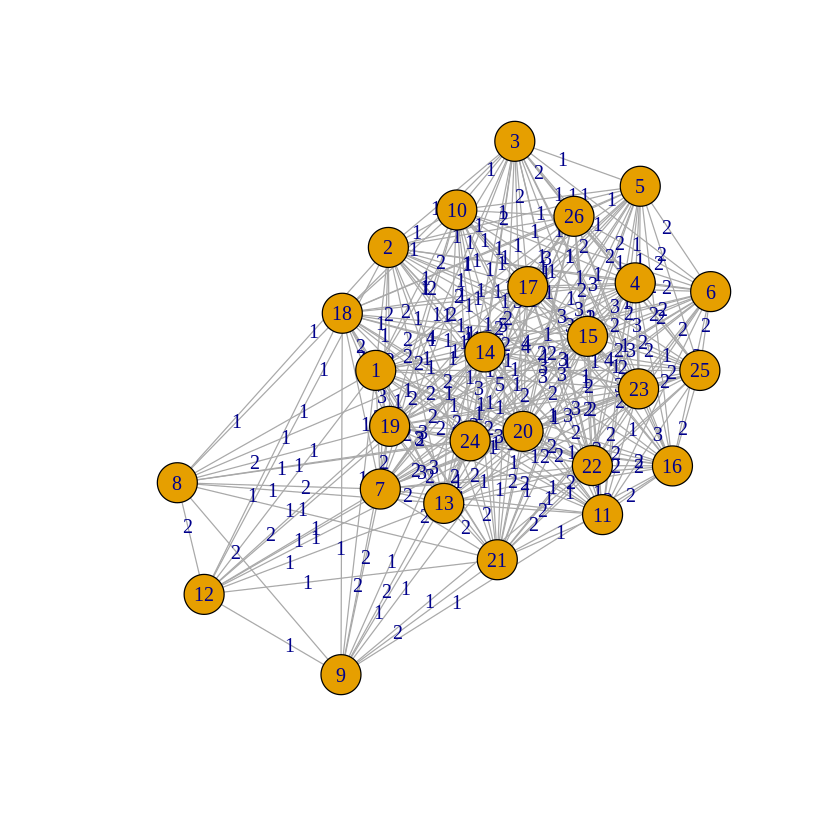

In [20]:
plot(ceo.agents.graph, edge.label=igraph::E(ceo.agents.graph)$weight)

* Ценностная матрица для сети перекрытия событий

In [21]:
ceo.events.adjacency

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
V1,3,0,2,3,0,1,1,1,1,1,0,0,0,0,1
V2,0,11,11,2,1,3,0,1,1,0,3,3,3,2,6
V3,2,11,22,8,3,4,2,3,5,1,4,4,4,3,8
V4,3,2,8,12,1,1,3,2,4,3,3,2,2,0,4
V5,0,1,3,1,3,0,1,0,1,0,1,1,0,0,1
V6,1,3,4,1,0,4,0,1,0,0,0,0,1,1,3
V7,1,0,2,3,1,0,4,0,1,1,0,0,0,0,0
V8,1,1,3,2,0,1,0,4,0,1,0,0,0,1,1
V9,1,1,5,4,1,0,1,0,6,0,0,1,1,0,1
V10,1,0,1,3,0,0,1,1,0,3,1,0,0,0,0


* Взвешенный граф для сети перекрытия событий

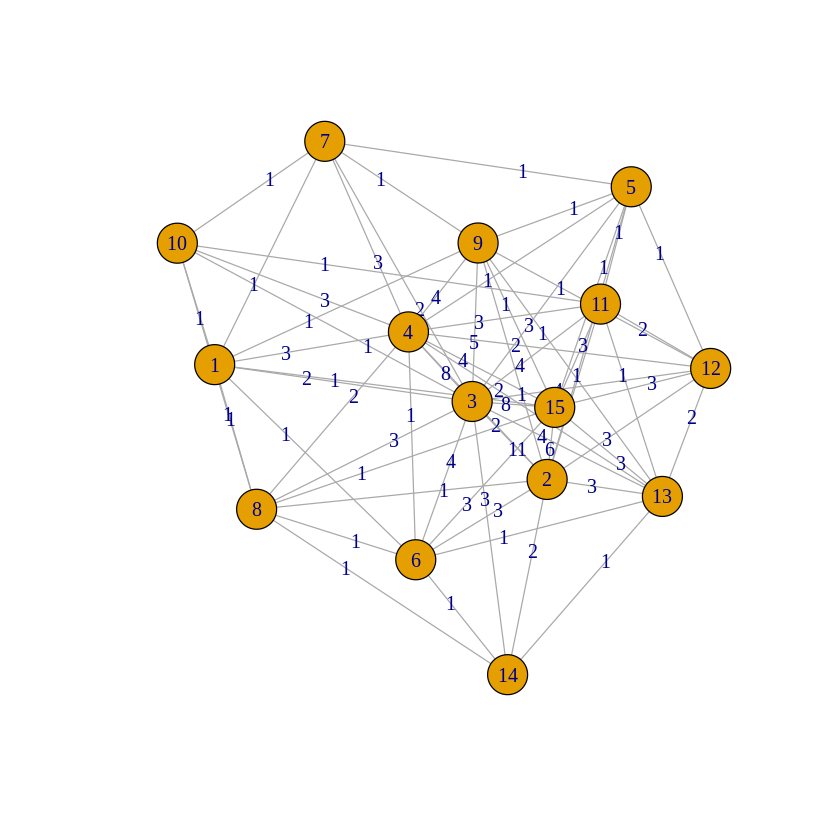

In [22]:
plot(ceo.events.graph, edge.label=igraph::E(ceo.events.graph)$weight)

* Выводы: Сеть аффилированности разложилась на две сети, которые удобнее анализировать. Сразу же можно увидеть, что сеть сопричастности более плотная, нежели сеть перекрытия событий

### 8. Вычислить степень участия для каждого актора, а также среднее количество событий, с которыми актор аффилирован. Сделать выводы.

* Степень участия для каждого актора

In [23]:
ceo.agent.deg <- diag(ceo.agents.adjacency)
ceo.deg.df <- data.frame(degree=ceo.agent.deg)
data1 <- cbind(CEO = 1:nrow(ceo.deg.df), ceo.deg.df)
data1 

CEO,degree
<int>,<dbl>
1,3
2,3
3,2
4,3
5,3
6,3
7,4
8,3
9,4


* Среднее количество событий.

In [24]:
sum(ceo.agent.deg)/26

[1] 3.769231

* Выводы: Благодаря обработанным данным, мы можем выделить три наиболее важные характеристики: актор с наибольшей степенью участия, актор с наименьшей степенью участия и средняя степень участия. На основе этих числовых характеристик мы можем утверждать, что ceo14 принимает наибольшее участие в клубах (7), ceo3, ceo10 и ceo12 принимают наименьшее участие в клубах (2), и в среднем каждый из ceo состоит приблизительно в 4 клубах.

### 9. Вычислить размер и средний размер для каждого события. Сделать выводы.

* Размер для каждого события

In [85]:
ceo.event.size <- diag(ceo.events.adjacency)
ceo.size.df <- data.frame(size=ceo.event.size)
data2 <- cbind(event = 1:nrow(ceo.size.df), ceo.size.df)
data2 

,event,size
,<int>,<dbl>
V1,1,3
V2,2,11
V3,3,22
V4,4,12
V5,5,3
V6,6,4
V7,7,4
V8,8,4
V9,9,6


* Средний размер событий.

In [26]:
sum(ceo.event.size)/15

[1] 6.533333

Выводы: В среднем около 6 ceo в каждом клубе, клуб с самым большим размером события - это 3; 1, 5, 10, 14 - клубы с самым маленьким размером событий.

### 10. Вычислить плотность для соотношения соучастия и отношения перекрытия. Проинтерпретируйте полученные значения.

* Плотность для соотношения соучастия:

In [27]:
sum(ceo.agents.adjacency)/(26*25)

[1] 1.563077

* Плотность для отношенияя перекрытия 

In [28]:
sum(ceo.events.adjacency)/(15*14)

[1] 1.952381

Выводы: Обе плотности низкие, что скорее всего обусловлено разными интересами акторов и несвязанностью событий

### 11. Определить диаметр сети аффилированности.

* Диаметр сети аффилированности

In [29]:
igraph::diameter(ceo.graph)

[1] 5

* Путь диаметра

In [30]:
igraph::get_diameter(ceo.graph)

+ 6/41 vertices, from 3c939b0:
[1]  8 30  1 29  5 40

### 12. Определить клики уровня с = {4, 3} для отношения соучастия и клики уровня с = {6, 5, 4, 3, 2} для отношения перекрытия событий. Сделать выводы.

In [86]:
c_list <- c(4, 3)
cat("3-клики")
igraph::cliques(ceo.agents.graph, 0, 3)
cat("\n")

cat("4-клики")
igraph::cliques(ceo.agents.graph, 0, 4)
cat("\n")

3-клики

[[1]]
+ 1/26 vertex, from 839c98e:
[1] 24

[[2]]
+ 1/26 vertex, from 839c98e:
[1] 21

[[3]]
+ 2/26 vertices, from 839c98e:
[1] 21 24

[[4]]
+ 1/26 vertex, from 839c98e:
[1] 20

[[5]]
+ 2/26 vertices, from 839c98e:
[1] 20 21

[[6]]
+ 3/26 vertices, from 839c98e:
[1] 20 21 24

[[7]]
+ 2/26 vertices, from 839c98e:
[1] 20 24

[[8]]
+ 1/26 vertex, from 839c98e:
[1] 19

[[9]]
+ 2/26 vertices, from 839c98e:
[1] 19 20

[[10]]
+ 3/26 vertices, from 839c98e:
[1] 19 20 21

[[11]]
+ 3/26 vertices, from 839c98e:
[1] 19 20 24

[[12]]
+ 2/26 vertices, from 839c98e:
[1] 19 21

[[13]]
+ 3/26 vertices, from 839c98e:
[1] 19 21 24

[[14]]
+ 2/26 vertices, from 839c98e:
[1] 19 24

[[15]]
+ 1/26 vertex, from 839c98e:
[1] 14

[[16]]
+ 2/26 vertices, from 839c98e:
[1] 14 19

[[17]]
+ 3/26 vertices, from 839c98e:
[1] 14 19 20

[[18]]
+ 3/26 vertices, from 839c98e:
[1] 14 19 21

[[19]]
+ 3/26 vertices, from 839c98e:
[1] 14 19 24

[[20]]
+ 2/26 vertices, from 839c98e:
[1] 14 20

[[21]]
+ 3/26 vertices, from 839c


4-клики

[[1]]
+ 1/26 vertex, from 839c98e:
[1] 24

[[2]]
+ 1/26 vertex, from 839c98e:
[1] 21

[[3]]
+ 2/26 vertices, from 839c98e:
[1] 21 24

[[4]]
+ 1/26 vertex, from 839c98e:
[1] 20

[[5]]
+ 2/26 vertices, from 839c98e:
[1] 20 21

[[6]]
+ 3/26 vertices, from 839c98e:
[1] 20 21 24

[[7]]
+ 2/26 vertices, from 839c98e:
[1] 20 24

[[8]]
+ 1/26 vertex, from 839c98e:
[1] 19

[[9]]
+ 2/26 vertices, from 839c98e:
[1] 19 20

[[10]]
+ 3/26 vertices, from 839c98e:
[1] 19 20 21

[[11]]
+ 4/26 vertices, from 839c98e:
[1] 19 20 21 24

[[12]]
+ 3/26 vertices, from 839c98e:
[1] 19 20 24

[[13]]
+ 2/26 vertices, from 839c98e:
[1] 19 21

[[14]]
+ 3/26 vertices, from 839c98e:
[1] 19 21 24

[[15]]
+ 2/26 vertices, from 839c98e:
[1] 19 24

[[16]]
+ 1/26 vertex, from 839c98e:
[1] 14

[[17]]
+ 2/26 vertices, from 839c98e:
[1] 14 19

[[18]]
+ 3/26 vertices, from 839c98e:
[1] 14 19 20

[[19]]
+ 4/26 vertices, from 839c98e:
[1] 14 19 20 21

[[20]]
+ 4/26 vertices, from 839c98e:
[1] 14 19 20 24

[[21]]
+ 3/26 vertice

### 13. Для каждых пар событий определить отношение шансов. Сделать выводы.

In [89]:

kl <- t(as.matrix(ceo.incmatrix)) %*% as.matrix(ceo.incmatrix)
notkl <- (1-t(as.matrix(ceo.incmatrix)))%*%(1-as.matrix(ceo.incmatrix))
notk_l <- (1-t(as.matrix(ceo.incmatrix)))%*%as.matrix(ceo.incmatrix)
k_notl <- t(as.matrix(ceo.incmatrix))%*%(1-as.matrix(ceo.incmatrix))
  
res <- c()
for(i in 2:nrow(kl)){
   for(j in 1:(i-1)){
     cat(paste("Tetta(",i,", ",j,") = ", (kl[i,j]*notkl[i,j])/(notk_l[i,j]*k_notl[i,j]),sep=" "), "\n")
   }
}

Tetta( 2 ,  1 ) =  0 
Tetta( 3 ,  1 ) =  0.3 
Tetta( 3 ,  2 ) =  Inf 
Tetta( 4 ,  1 ) =  Inf 
Tetta( 4 ,  2 ) =  0.111111111111111 
Tetta( 4 ,  3 ) =  0 
Tetta( 5 ,  1 ) =  0 
Tetta( 5 ,  2 ) =  0.65 
Tetta( 5 ,  3 ) =  Inf 
Tetta( 5 ,  4 ) =  0.545454545454545 
Tetta( 6 ,  1 ) =  3.33333333333333 
Tetta( 6 ,  2 ) =  5.25 
Tetta( 6 ,  3 ) =  Inf 
Tetta( 6 ,  4 ) =  0.333333333333333 
Tetta( 6 ,  5 ) =  0 
Tetta( 7 ,  1 ) =  3.33333333333333 
Tetta( 7 ,  2 ) =  0 
Tetta( 7 ,  3 ) =  0.1 
Tetta( 7 ,  4 ) =  4.33333333333333 
Tetta( 7 ,  5 ) =  3.33333333333333 
Tetta( 7 ,  6 ) =  0 
Tetta( 8 ,  1 ) =  3.33333333333333 
Tetta( 8 ,  2 ) =  0.4 
Tetta( 8 ,  3 ) =  0.473684210526316 
Tetta( 8 ,  4 ) =  1.2 
Tetta( 8 ,  5 ) =  0 
Tetta( 8 ,  6 ) =  2.11111111111111 
Tetta( 8 ,  7 ) =  0 
Tetta( 9 ,  1 ) =  1.8 
Tetta( 9 ,  2 ) =  0.2 
Tetta( 9 ,  3 ) =  0.882352941176471 
Tetta( 9 ,  4 ) =  3 
Tetta( 9 ,  5 ) =  1.8 
Tetta( 9 ,  6 ) =  0 
Tetta( 9 ,  7 ) =  1.13333333333333 
Tetta( 9 ,  8 ) =

выводы: Можно увидеть, что аффилированность однородна, присутствуют как аффилированные с 1, так и с обоими событиями или не аффилирован с обоими событиями.

## Выводы

В ходе проделаной работы был получен навык работы с сетями аффилированности, алгоритмами поиска сообществ и биграффами, также было проведено знакомство с гиперграфами и двойственными гиперграфами. Получены навыки работы с математическими пакетами на языке R.